In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
%matplotlib inline

In [2]:
occupancy = pd.read_csv('Hotel Occupancy and Rate.csv')
occupancy = occupancy.iloc[:2].transpose()[3:]
occupancy.columns = ['Occupancy_pct', 'Rate_usd']
occupancy.head()

,Occupancy_pct,Rate_usd
1990-01,80.5,117.47
1990-02,88.5,113.31
1990-03,82.6,107.42
1990-04,76.7,102.08
1990-05,75.3,96.11


In [3]:
arrivals = pd.read_csv('Monthly Arrivals.csv')
arrivals = arrivals.iloc[:1].transpose()[4:]
arrivals.columns = ['Arrival']
arrivals.head()

,Arrival
1999-01,"540,656"
1999-02,"558,703"
1999-03,"600,286"
1999-04,"537,904"
1999-05,"515,209"


In [4]:
df = pd.merge(left=occupancy, right=arrivals, left_index=True, right_index=True)
df.head()

,Occupancy_pct,Rate_usd,Arrival
1999-01,71.8,133.43,"540,656"
1999-02,83.2,134.55,"558,703"
1999-03,76.0,134.55,"600,286"
1999-04,68.8,132.17,"537,904"
1999-05,65.1,125.37,"515,209"


Because the arrival data is unavailable from 1990 - 1998, I opted to drop these years. Starting from 1999 should provide sufficient data for the purposes of this explorative project.

In [5]:
df['Arrival'] = df['Arrival'].apply(lambda x: x.replace(',',''))
df.head()

,Occupancy_pct,Rate_usd,Arrival
1999-01,71.8,133.43,540656
1999-02,83.2,134.55,558703
1999-03,76.0,134.55,600286
1999-04,68.8,132.17,537904
1999-05,65.1,125.37,515209


In [6]:
df = df.applymap(lambda x: float(x))

In [7]:
df.to_csv('data.csv')

In [8]:
df.index = pd.to_datetime(df.index)

First, let's plot the arrival numbers per month over the years.

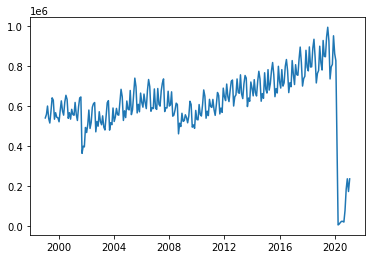

In [9]:
plt.plot(df.Arrival)
plt.show()

A few interesting notes:
- The arrivals to Hawaii are seasonal (repeating cyclic behavior)
- There are three main dips. It will be interesting to connect these dips to the world events correlated to these arrival declines.

Prior to adding an x-axis, I believed the first dip to be the "dot-com" bust and the less noticable dip mid-way through the data to be the after effects of September, 11. However, after re-formating the index to be dtype datetime, I was able to plot an insightful x-axis. The first major dip is clearly September 2001 while the later less noticable dip appears to correlate to the 2008 recession. Let's add some plotting features to confirm these predictions and see if any news articles corroborate these hypothesis.

In [10]:
sep_11_arrow_x = dt.datetime(2001,9,1)
sep_11_arrow_y = df.loc['2001-9-1','Arrival']
sep_11_label_x = dt.datetime(2000,1,1)
sep_11_label_y = 100000

arrow_properties = dict(
    facecolor="black", width=0.2,
    headwidth=5, shrink=0.1)

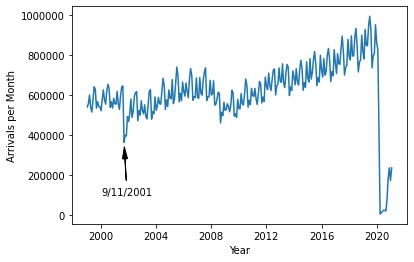

In [11]:
plt.plot(df.Arrival)
plt.yticks(ticks=np.arange(0,1200000,200000), labels=np.arange(0,1200000,200000))
plt.annotate('9/11/2001', xy=(sep_11_arrow_x, sep_11_arrow_y), xytext=(sep_11_label_x, sep_11_label_y), arrowprops=arrow_properties)
plt.xlabel('Year')
plt.ylabel('Arrivals per Month')
plt.show()

In [12]:
df.sort_values(by='Arrival')[df.sort_values(by='Arrival').index.year.isin([2007,2008,2009,2010])].head()

,Occupancy_pct,Rate_usd,Arrival
2008-09-01,63.0,178.43,461016.0
2009-11-01,61.1,162.46,488612.0
2009-09-01,63.6,160.41,494441.0
2008-11-01,63.5,177.80,497637.0
2009-10-01,66.4,164.63,505777.0


<p>This appears to confirm the 2008 recession hypothesis. Let's pull the official dates of the recession and plot them as vertical lines.</p>
<p>A quick internet search reveals 2007 - 2009 as pertinent years for the Great Recession. The applicable timespan reported for the USA was Q3-2008 until Q2-2009.</p>

In [13]:
rec_arrow_x = dt.datetime(2008,9,1)
rec_arrow_y = df.loc['2008-9-1','Arrival']
rec_label_x = dt.datetime(2002,1,1)
rec_label_y = 200000

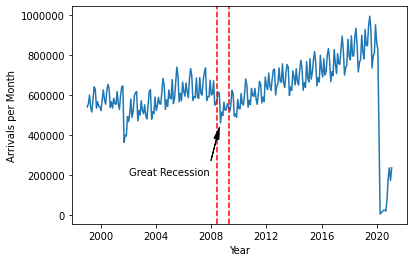

In [14]:
plt.plot(df.Arrival)
plt.yticks(ticks=np.arange(0,1200000,200000), labels=np.arange(0,1200000,200000))
plt.annotate('Great Recession', xy=(rec_arrow_x, rec_arrow_y), xytext=(rec_label_x, rec_label_y), arrowprops=arrow_properties)
plt.axvline(dt.datetime(2008,6,1), ls='--', c='r')
plt.axvline(dt.datetime(2009,4,1), ls='--', c='r')
plt.xlabel('Year')
plt.ylabel('Arrivals per Month')
plt.show()

Finally, let's see the month transition point that Hawaii entered lock-down for COVID.

In [15]:
df[df.index.year == 2020].head()

,Occupancy_pct,Rate_usd,Arrival
2020-01-01,84.1,314.27,862574.0
2020-02-01,84.7,310.31,828056.0
2020-03-01,44.5,279.90,434856.0
2020-04-01,8.9,131.16,4564.0
2020-05-01,14.2,126.72,9116.0


Is the drop from January to February significant or is the first major drop February to March? 

In [16]:
df[df.index.year == 2019].head()

,Occupancy_pct,Rate_usd,Arrival
2019-01-01,79.5,298.85,817600.0
2019-02-01,83.4,289.92,780827.0
2019-03-01,79.6,284.90,928849.0
2019-04-01,78.4,274.80,849398.0
2019-05-01,79.2,256.01,847396.0


In [17]:
df[df.index.year == 2018].head()

,Occupancy_pct,Rate_usd,Arrival
2018-01-01,81.7,295.16,794946.0
2018-02-01,85.6,293.98,776506.0
2018-03-01,81.7,288.65,896601.0
2018-04-01,80.5,269.45,795942.0
2018-05-01,79.5,256.07,796850.0


In [18]:
def bootstrap_function(start_year):
    jan_to_feb = []
    for year in range(start_year, 2021):
        jan_to_feb.append(df[df.index.year == year]['Arrival'][0] - df[df.index.year == year]['Arrival'][1])
    jan_to_feb = pd.DataFrame(jan_to_feb, columns=['Change'])
    jan_to_feb.index = np.arange(start_year,2021)
    jan_to_feb_mean = [jan_to_feb['Change'].sample(50, replace=True).mean() for _ in range(1000)       ]
    return jan_to_feb_mean, jan_to_feb

Let's use a bootstrap sampling of observed January to February differences and compute a p-value of the means to compare against the 2020 observed difference. This will allow us to make an educated decision on the statistical significance in change.

H0: The observed change is no different than any other year.
Ha: The observed change is statistically significant (diffent) than in years past.
</br>p-value: 0.05

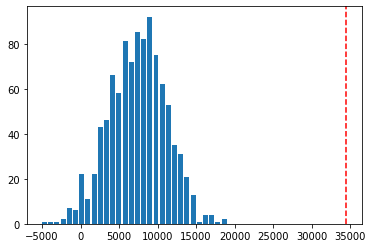

In [19]:
jan_to_feb_1999, jan_to_feb = bootstrap_function(1999)
plt.hist(jan_to_feb_1999, bins=30, rwidth=0.8)
plt.axvline(jan_to_feb.loc[2020]['Change'], ls='--', c='r')
plt.show()

In [20]:
print('p-value:', np.mean([diff > jan_to_feb.iloc[-1]['Change'] for diff in jan_to_feb_1999]))

p-value: 0.0


The bootstrap would suggest that this change is significant (reject the null hypothesis). However, it is important to remember that this is a Time Series Dataset, so it is impacted by annual change.
</br>
Let's see what happens if we change the starting year to 2015.

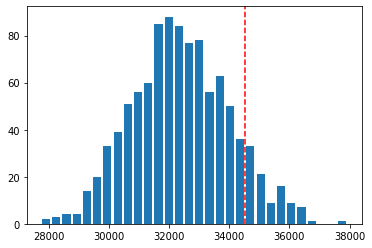

In [21]:
jan_to_feb_2015, jan_to_feb = bootstrap_function(2015)
plt.hist(jan_to_feb_2015, bins=30, rwidth=0.8)
plt.axvline(jan_to_feb.loc[2020]['Change'], ls='--', c='r')
plt.show()

In [22]:
print('p-value:', np.mean([diff > jan_to_feb.iloc[-1]['Change'] for diff in jan_to_feb_2015]))

p-value: 0.097


Based on our second boostrap, we can see that compared to recent years, the observed change from January to February is statistically similar to years past. Therefore, the first major month that Hawaii saw an impact from COVID was March 2020. The [Honolulu Magazine](https://www.honolulumagazine.com/a-covid-19-timeline-how-honolulu-got-to-this-point) provides a detailed look at the 14 day quarantine and stay at home orders commencing in March, confirming our earlier hypothesis.

In [23]:
covid_arrow_x = dt.datetime(2020,3,1)
covid_arrow_y = df.loc['2020-3-1','Arrival']
covid_label_x = dt.datetime(2012,1,1)
covid_label_y = 200000

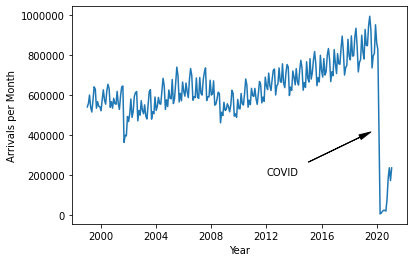

In [24]:
plt.plot(df.Arrival)
plt.yticks(ticks=np.arange(0,1200000,200000), labels=np.arange(0,1200000,200000))
plt.annotate('COVID', xy=(covid_arrow_x, covid_arrow_y), xytext=(covid_label_x, covid_label_y), arrowprops=arrow_properties)
plt.xlabel('Year')
plt.ylabel('Arrivals per Month')
plt.show()

Now let's switch gears and produce trend lines for the tourist arrival rate between 9/11 and the Great Recession as well as between the Great Recession and COVID.

In [25]:
df_911_recession = df['2001-12-01':'2008-03-01']
df_recession_covid = df['2008-10-1':'2020-02-01']

<AxesSubplot:>

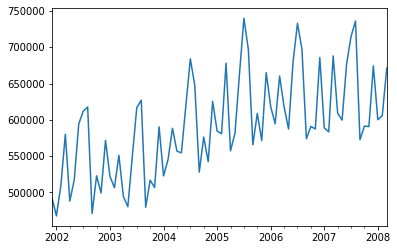

In [26]:
df_911_recession['Arrival'].plot()

In [27]:
import scipy.stats as st

In [28]:
x = np.array(df_recession_covid.index, dtype=float)
y = np.array(df_recession_covid['Arrival'], dtype=float)
slope, intercept, _, _, _ = st.linregress(x,y)
print("Slope:",slope)
print("Intercept:", intercept)

Slope: 9.429875759054843e-13
Intercept: -621566.6000519609


In [29]:
x_covid = np.linspace(min(x), max(x), 100)
x_covid_dt = pd.to_datetime(x_covid)
y_covid = (slope * x_covid) + intercept

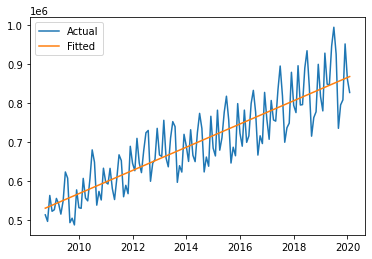

In [30]:
plt.plot(df_recession_covid['Arrival'], label = 'Actual')
plt.plot(x_covid_dt, y_covid, label='Fitted')
plt.legend()
plt.show()

In [31]:
x = np.array(df_911_recession.index, dtype=float)
y = np.array(df_911_recession['Arrival'], dtype=float)
slope, intercept, _, _, _ = st.linregress(x, y)
x_911 = np.linspace(min(x), max(x), 100)
x_911_dt = pd.to_datetime(x_911)
y_911 = (slope * x_911) + intercept
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 7.221758121472265e-13
Intercept: -206344.40550440573


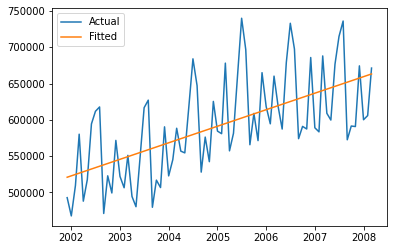

In [32]:
plt.plot(df_911_recession['Arrival'], label='Actual')
plt.plot(x_911_dt, y_911, label='Fitted')
plt.legend()
plt.show()

Simply comparing the slopes, we can see that the post recession arrival rate was greater than the post 9/11 - Great Recession Arrival rate. Let's put this all together on one plot to see.

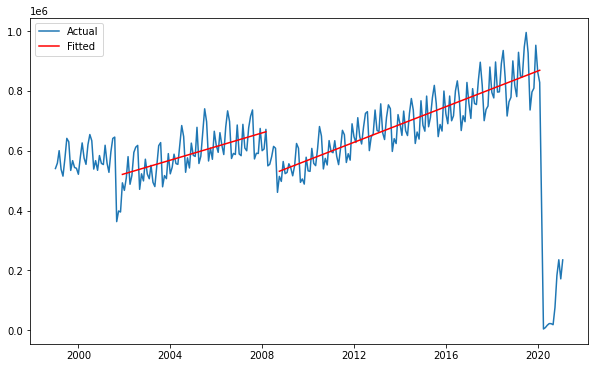

In [33]:
plt.figure(figsize=(10,6))
plt.plot(df['Arrival'], label='Actual')
plt.plot(x_911_dt, y_911, color='red')
plt.plot(x_covid_dt, y_covid, label='Fitted', color='red')
plt.legend()
plt.show()

Next, let's examine the cyclic nature of arrivals. What are the peak arrival months and when is the "down" season?
As resident of Hawaii, my initial instinct is to predict late spring/summer and winter to be the peak seasons.

In [34]:
top_arrivals = []
for year in set(df.index.year):
    top_arrivals.append(df.loc[str(year)].sort_values(by = 'Arrival', ascending=False)[:5])

In [35]:
top_arrivals = pd.concat(top_arrivals)

In [36]:
top_arrivals.index.month.value_counts()

3     22
7     21
8     21
6     20
12    19
1      3
2      3
4      1
10     1
11     1
dtype: int64

And with that, we can confirm my hypothesis based on traffic and beach capacity observations over the last 5 years! Spring Break, Summer, and Winter are the most popular tourist arrival months. As an interesting note for future work, this also corresponds to school year breaks.

In [37]:
top_months = [3, 7, 8, 6, 12]

In [38]:
df['Peak'] = df.index.month.isin(top_months).astype('int')

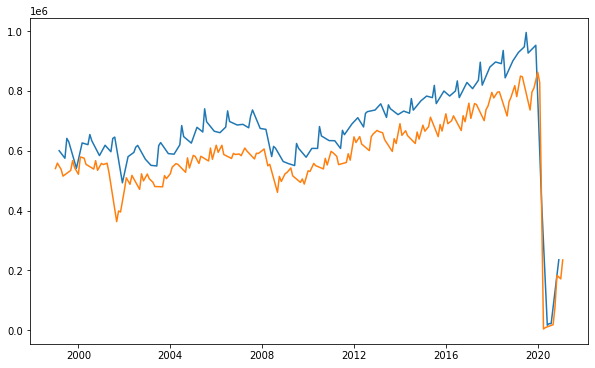

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df[df.Peak == 1]['Arrival'])
plt.plot(df[df.Peak == 0]['Arrival'])
plt.show()

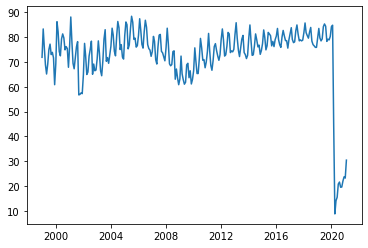

In [40]:
plt.plot(df.Occupancy_pct)
plt.show()

In [41]:
df[df.Occupancy_pct < 70][:25]

,Occupancy_pct,Rate_usd,Arrival,Peak
1999-04-01,68.8,132.17,537904.0,0
1999-05-01,65.1,125.37,515209.0,0
1999-06-01,69.1,125.96,574999.0,1
1999-12-01,60.8,152.03,541492.0,1
2000-01-01,69.3,145.61,521429.0,0
2000-12-01,67.8,153.88,583917.0,1
2001-04-01,69.4,151.25,558383.0,0
2001-05-01,67.2,140.90,527865.0,0
2001-09-01,56.7,129.06,363219.0,0
2001-10-01,56.9,131.58,398790.0,0


Most of these dates check with our previously explored declines in arrival:
- Post 9/11
- Great Recession
- COVID
</br>
However, there is one year/month on this list that does not correlate with these events: May 2007. There is also no corresponding drop in Arrivals for May 2007. Let's see if this is historically significant!

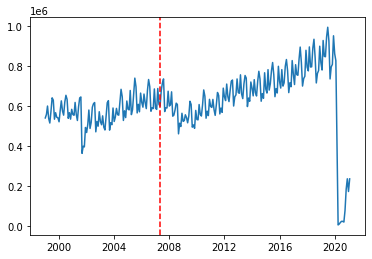

In [42]:
plt.plot(df.Arrival)
plt.axvline('2007-05-01', ls = '--', c='r')
plt.show()

An internet search doesn't return anything outside the ordinary. This appears to have been consistent with the reduced number of visitors in May 2007.

## AirBnB?
The only remaining investigation of interst was trying to correlate a drop in Hotel Occupancy to the genesis of AirBnB. However, this was deemed improbable due to the dates overlapping with the Great Recession. It would be infeasible to seperate the effects based upon recession or AirBnb.